In [1]:
# Import necessary libraries
import os
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image

# Import preprocess_single_image from inference_preprocess.py
from scripts.inference_preprocess import preprocess_single_image
from scripts.preprocess import load_image, normalize_image, small_data

In [2]:
# Load the trained U-Net model
model_path = "/Users/alessandro/code/acgontijo/pixel_prediction/models/trained_model.keras"
model = load_model(model_path)
print("Model loaded successfully!")

Model loaded successfully!


In [3]:
model

<Functional name=functional, built=True>

In [4]:
# Paths to the three bands (R, G, B)
image_paths = [
    "/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B4_-55.20_-4.19_2016_08_16.tiff",   # SR_B4 (Red)
    "/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B3_-55.20_-4.19_2016_08_16.tiff", # SR_B3 (Green)
    "/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B2_-55.20_-4.19_2016_08_16.tiff"  # SR_B2 (Blue)
]

In [5]:
image_red = load_image(image_paths[0])
image_green = load_image(image_paths[1])
image_blue = load_image(image_paths[2])

In [6]:
image_paths[0]

'/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B4_-55.20_-4.19_2016_08_16.tiff'

In [7]:
image_paths[1]

'/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B3_-55.20_-4.19_2016_08_16.tiff'

In [8]:
image_paths[2]

'/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B2_-55.20_-4.19_2016_08_16.tiff'

In [9]:
image_red_normalized = normalize_image(image_red)
image_green_normalized = normalize_image(image_green)
image_blue_normalized = normalize_image(image_blue)

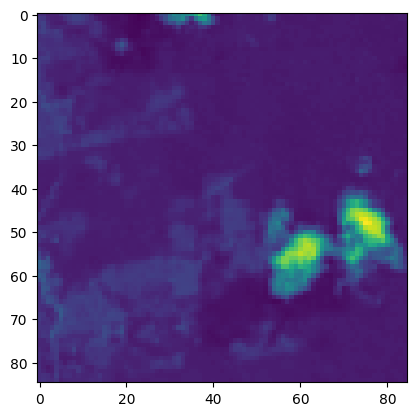

In [10]:
plt.imshow(image_red_normalized) #cmap="gray")

In [11]:
image_color = np.stack([image_red_normalized, image_green_normalized, image_blue_normalized], axis=-1)

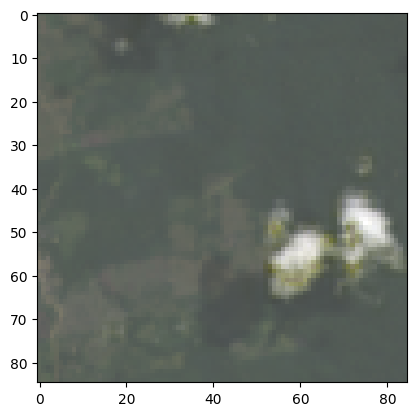

In [12]:
plt.imshow(image_color);

In [13]:
# # Preprocess the images into a single RGB image
# preprocessed_image = preprocess_single_image(image_paths, resize_to=(85, 85))
# print(f"Preprocessed image shape: {preprocessed_image.shape}")

In [14]:
directory_x = "../data/raw/images"
directory_y = "../data/raw/targets"
substring = '2016_08'
num_files = 1000

In [15]:
# Preprocess the images into a single RGB image
x, y = small_data(directory_x, directory_y, substring, num_files)

In [16]:
y.shape

(1000, 85, 85)

In [17]:
y

array([[[21824, 21824, 21824, ..., 21824, 21824, 21824],
        [21824, 21824, 21824, ..., 21824, 21824, 21824],
        [21824, 21824, 21824, ..., 21824, 21824, 21824],
        ...,
        [21824, 21824, 21824, ..., 21824, 21824, 21824],
        [21824, 21824, 21824, ..., 21824, 21824, 21824],
        [21824, 21824, 21824, ..., 21824, 21824, 21824]],

       [[ 8154,  8116,  8131, ..., 26840, 31994, 33685],
        [ 8027,  8076,  8067, ..., 27674, 27335, 31534],
        [ 8100,  8070,  7982, ..., 28901, 27265, 30569],
        ...,
        [ 7449,  5023,  5727, ...,  8168,  8233,  8119],
        [ 8771,  7296,  6734, ...,  8087,  8204,  8078],
        [ 8176,  6589,  5709, ...,  8156,  8165,  8132]],

       [[13687, 14677, 14964, ..., 14030, 13935, 13525],
        [13563, 14520, 15228, ..., 13940, 14229, 13415],
        [13459, 13945, 14888, ..., 14020, 14007, 13555],
        ...,
        [12842, 12606, 12691, ..., 13329, 13510, 13327],
        [12520, 12884, 13152, ..., 12963, 129

In [18]:
x.shape

(0,)

In [19]:
x

array([], dtype=float64)

In [20]:
# Run the model prediction
prediction = model.predict(preprocessed_image)
print(f"Prediction shape: {prediction.shape}")

NameError: name 'preprocessed_image' is not defined

In [ ]:
# Load the original band images for comparison
r_image = Image.open(image_paths[0])
g_image = Image.open(image_paths[1])
b_image = Image.open(image_paths[2])

In [ ]:
# Plot the individual bands and the RGB stacked image
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Red Band (SR_B4)")
plt.imshow(r_image, cmap="Reds")

plt.subplot(2, 2, 2)
plt.title("Green Band (SR_B3)")
plt.imshow(g_image, cmap="Greens")

plt.subplot(2, 2, 3)
plt.title("Blue Band (SR_B2)")
plt.imshow(b_image, cmap="Blues")

plt.subplot(2, 2, 4)
plt.title("RGB Stacked Image")
plt.imshow(preprocessed_image[0])  # Remove batch dimension

plt.show()

In [ ]:
# Visualize the prediction mask
plt.figure(figsize=(10, 5))
plt.title("Predicted Mask")
plt.imshow(prediction[0, :, :, 0], cmap="gray")
plt.colorbar()
plt.show()

In [ ]:
# Paths to the three bands (R, G, B)
image_paths = [
    "/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B4_-55.20_-4.19_2016_08_16.tiff",   # SR_B4 (Red)
    "/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B3_-55.20_-4.19_2016_08_16.tiff", # SR_B3 (Green)
    "/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B2_-55.20_-4.19_2016_08_16.tiff"  # SR_B2 (Blue)
]

In [ ]:
# Import the preprocessing function
from scripts.inference_preprocess import preprocess_single_image

# Preprocess the image
preprocessed_image = preprocess_single_image(image_paths, resize_to=(85, 85))

# Verify the shape of the preprocessed image
print(f"Preprocessed image shape: {preprocessed_image.shape}")

In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model_path = "/Users/alessandro/code/acgontijo/pixel_prediction/models/trained_model.keras"
model = load_model(model_path)
print("Model loaded successfully!")

In [ ]:
# Generate prediction
prediction = model.predict(preprocessed_image)

# Verify the shape of the prediction
print(f"Prediction shape: {prediction.shape}")

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the original band images for visualization
r_image = Image.open(image_paths[0])
g_image = Image.open(image_paths[1])
b_image = Image.open(image_paths[2])

# Visualize the input and output
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title("Red Band (SR_B4)")
plt.imshow(r_image, cmap="Reds")

plt.subplot(2, 2, 2)
plt.title("Green Band (SR_B3)")
plt.imshow(g_image, cmap="Greens")

plt.subplot(2, 2, 3)
plt.title("Blue Band (SR_B2)")
plt.imshow(b_image, cmap="Blues")

plt.subplot(2, 2, 4)
plt.title("RGB Stacked Image")
plt.imshow(preprocessed_image[0])  # Remove batch dimension

plt.show()

# Visualize the prediction mask
plt.figure(figsize=(10, 5))
plt.title("Predicted Mask")
plt.imshow(prediction[0, :, :, 0], cmap="gray")
plt.colorbar()
plt.show()

In [ ]:
print("RGB Image Statistics:")
print(f"Min: {preprocessed_image.min()}, Max: {preprocessed_image.max()}")
print(f"Mean: {preprocessed_image.mean()}, Shape: {preprocessed_image.shape}")

In [ ]:
# Inspect preprocessed input
print(f"Preprocessed input shape: {preprocessed_image.shape}")
print(f"Preprocessed input min: {preprocessed_image.min()}, max: {preprocessed_image.max()}")

In [ ]:
# Create a synthetic RGB image for testing
test_image = np.ones((1, 85, 85, 3)) * 0.5  # Uniform image with all values = 0.5
test_prediction = model.predict(test_image)

print("Test Prediction Statistics:")
print(f"Min: {test_prediction.min()}, Max: {test_prediction.max()}")
print(f"Prediction Shape: {test_prediction.shape}")

In [ ]:
# Convert predicted mask to binary
binary_mask = (prediction[0, :, :, 0] > 0.5).astype(np.uint8)

# Visualize binary mask
plt.figure(figsize=(10, 5))
plt.title("Binary Predicted Mask")
plt.imshow(binary_mask, cmap="gray")
plt.colorbar()
plt.show()

In [ ]:
# Create a synthetic test input
test_image = np.ones((1, 85, 85, 3)) * 0.5  # Uniform image with values 0.5

# Run prediction
test_prediction = model.predict(test_image)

# Visualize the output
plt.imshow(test_prediction[0, :, :, 0], cmap="gray")
plt.title("Synthetic Test Input Prediction")
plt.colorbar()
plt.show()

In [ ]:
# Print the model summary
model.summary()

In [ ]:
# Check the weights of a sample layer
layer_name = model.layers[-1].name  # Replace with a known layer name
weights = model.get_layer(layer_name).get_weights()

if weights:
    print(f"Weights of layer '{layer_name}': {weights}")
else:
    print(f"No weights found for layer '{layer_name}'")

In [ ]:
# Use an image from the training dataset
# Paths to the three bands (R, G, B)
image_paths = [
    "/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B4_-55.20_-4.19_2016_08_16.tiff",   # SR_B4 (Red)
    "/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B3_-55.20_-4.19_2016_08_16.tiff", # SR_B3 (Green)
    "/Users/alessandro/code/acgontijo/pixel_prediction/data/raw/images/Landsat8_SR_B2_-55.20_-4.19_2016_08_16.tiff"  # SR_B2 (Blue)
]

# Preprocess the training image
training_preprocessed_image = preprocess_single_image(training_image_paths, resize_to=(85, 85))

# Predict
training_prediction = model.predict(training_preprocessed_image)

# Visualize
plt.imshow(training_prediction[0, :, :, 0], cmap="gray")
plt.title("Prediction on Training Data")
plt.colorbar()
plt.show()